In [3]:
import pandas as pd


# Datei einlesen (Pfad anpassen, wenn nötig)
df = pd.read_excel('/Users/umerhanif/Downloads/EFA Beispiel (4).xlsx')

df = df.drop(df.columns[0], axis=1)
# Ersten Blick auf die Daten
df.head() 



,Milchig,Schmelzend,Künstlich,Fruchtig,Erfrischend
0,6,6,3,5,5
1,3,7,4,6,3
2,5,4,6,2,4
3,5,6,2,3,7
4,6,7,6,5,6


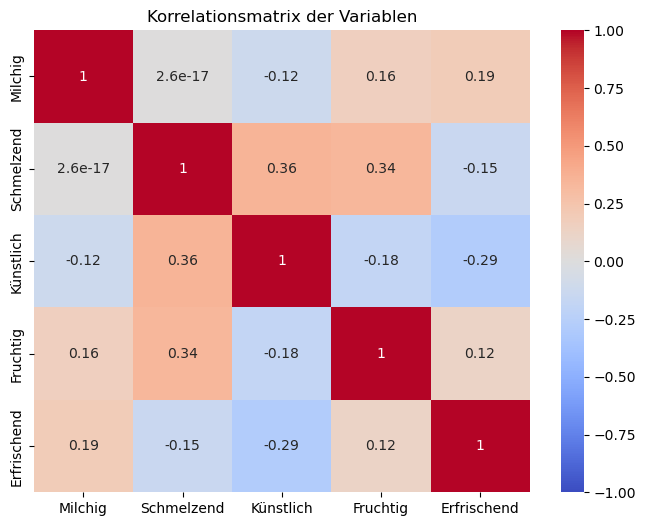

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatrix berechnen
correlation_matrix = df.corr()

# Heatmap visualisieren
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelationsmatrix der Variablen")
plt.show()


In [5]:
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO-Berechnung
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO-Gesamtwert: {kmo_model:.3f}")

# Bartlett-Test
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett Chi²: {chi_square_value:.2f}, p-Wert: {p_value:.4f}")


KMO-Gesamtwert: 0.453
Bartlett Chi²: 3.58, p-Wert: 0.9644


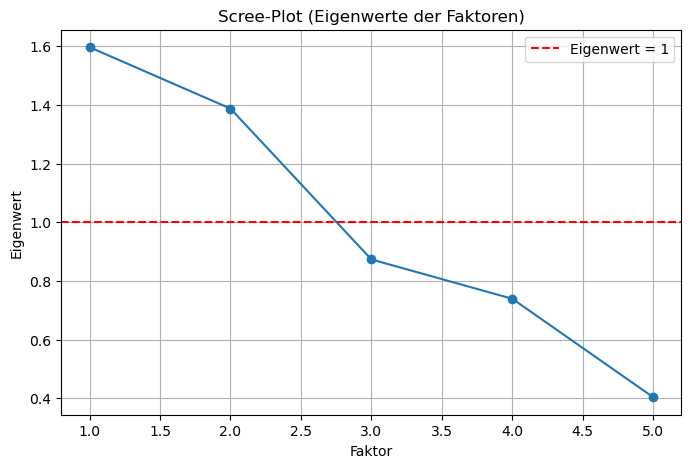

Faktor 1: Eigenwert = 1.597
Faktor 2: Eigenwert = 1.388
Faktor 3: Eigenwert = 0.873
Faktor 4: Eigenwert = 0.739
Faktor 5: Eigenwert = 0.403


In [6]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# 2.1: PCA durchführen (ohne Rotation, für Scree-Plot)
fa = FactorAnalyzer(rotation=None)
fa.fit(df)

# 2.2: Eigenwerte holen
eigenwerte, _ = fa.get_eigenvalues()

# 2.3: Scree-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenwerte)+1), eigenwerte, marker='o')
plt.title('Scree-Plot (Eigenwerte der Faktoren)')
plt.xlabel('Faktor')
plt.ylabel('Eigenwert')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--', label='Eigenwert = 1')
plt.legend()
plt.show()

# Optional: Eigenwerte ausgeben
for i, val in enumerate(eigenwerte, start=1):
    print(f"Faktor {i}: Eigenwert = {val:.3f}")


In [7]:
from factor_analyzer import FactorAnalyzer

# Faktorenanalyse mit 2 Faktoren + Varimax-Rotation
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df)

# Faktorlade-Matrix abrufen
loadings = fa.loadings_

# Faktorlade-Matrix schön darstellen
loading_df = pd.DataFrame(loadings, 
                          index=df.columns, 
                          columns=["Faktor 1", "Faktor 2"])
print("Faktorlade-Matrix (rotierte Ladungen):")
print(loading_df.round(3))


Faktorlade-Matrix (rotierte Ladungen):
             Faktor 1  Faktor 2
Milchig         0.090     0.300
Schmelzend      0.965    -0.258
Künstlich       0.198    -0.614
Fruchtig        0.457     0.398
Erfrischend    -0.046     0.448


In [8]:
# Faktorscores berechnen (Standard: Regressionsmethode)
factor_scores = fa.transform(df)

# In DataFrame umwandeln
scores_df = pd.DataFrame(factor_scores, 
                         columns=["Faktor 1", "Faktor 1"])
scores_df.index += 1  # Testpersonen von 1 bis 30 nummerieren

# Erste Zeilen anzeigen
scores_df.head()


,Faktor 1,Faktor 1
1,0.785304,0.431345
2,1.162394,-0.510921
3,-0.851922,-0.838731
4,0.775365,0.492932
5,1.239131,-0.128927
